In [52]:
#引入包
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [53]:
#导入数据
filename = 'data1.txt'
data = np.loadtxt(filename,delimiter=',')
print(data.shape)
feature_num = data.shape[1]-1
data = data.astype('float32')#转化类型为float32
#print(data)

(47, 3)


In [79]:
#数据划分
data_train, data_test = train_test_split(data, test_size=0.3, random_state=66)#随机划分，7：3划分

X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]

#print(y_train)
#特征缩放
data_train_max = np.max(data_train,0)
data_train_min = np.min(data_train,0)
data_train = (data_train-data_train_min)/(data_train_max-data_train_min)#归一化处理
#print(data_train)

X_train = data_train[:, :2]
y_train = data_train[:, 2]
X_train_norm = np.concatenate((X_train,np.ones((X_train.shape[0],1))), axis=1)#拼接为X，便于相乘

print(X_train_norm)

[[0.17366302 0.5        1.        ]
 [0.61443359 0.5        1.        ]
 [0.11960897 0.25       1.        ]
 [0.12277171 0.5        1.        ]
 [0.34502587 0.5        1.        ]
 [0.45054629 0.75       1.        ]
 [0.02875216 0.5        1.        ]
 [0.14203565 0.5        1.        ]
 [0.1092582  0.5        1.        ]
 [0.83093733 0.5        1.        ]
 [0.25589418 0.5        1.        ]
 [0.23317999 0.75       1.        ]
 [0.15353651 0.5        1.        ]
 [0.40253019 0.5        1.        ]
 [0.24123059 0.25       1.        ]
 [0.4626222  0.75       1.        ]
 [0.31742382 0.5        1.        ]
 [0.3559517  0.5        1.        ]
 [0.05750431 0.5        1.        ]
 [0.         0.         1.        ]
 [0.28752157 0.5        1.        ]
 [0.4387579  0.5        1.        ]
 [0.47067279 0.5        1.        ]
 [0.19091432 0.25       1.        ]
 [0.0920069  0.25       1.        ]
 [0.24496837 0.75       1.        ]
 [0.27027026 0.75       1.        ]
 [0.25531915 0.25       1.  

In [80]:

#正规方程
X_term = np.matmul(X_train_norm.T,X_train_norm)#X转置*X
X_term_inver = np.linalg.inv(X_term)#求逆
W = np.matmul(np.matmul(X_term_inver,X_train_norm.T),y_train.reshape(-1,1))
print(W)


[[ 0.89347729]
 [-0.01954992]
 [ 0.08250729]]


In [95]:
#模型初始化
w = np.random.rand(feature_num+1,1)#随机分布

#梯度下降
def Loss(y_pred,y):
    return np.mean(np.square(y_pred-y))#Loss function

repet = 20000
learn = 0.01
log = []
test_log = []
for i in range(repet):
    y_pre = np.matmul(X_train_norm,w)
    term = learn*np.mean((y_pre-y_train.reshape(-1,1))*X_train_norm, axis=0).reshape(-1,1)
    w = w -term
    y_test_pre = np.matmul(X_test,w)
    loss = Loss(y_pre.reshape(-1,1),y_train.reshape(-1,1))
    test_loss = Loss(y_test_pre.reshape(-1,1),y_test.reshape(-1,1))
    if i%100 == 0:
        print('i:{},loss:{}'.format(i,loss))
    log.append([i,loss])
    test_log.append([i,test_loss])

print(w)

i:0,loss:0.07545201863643439
i:100,loss:0.03997257667962169
i:200,loss:0.03629282690876322
i:300,loss:0.034784918435956214
i:400,loss:0.033521399385761735
i:500,loss:0.03236829459510871
i:600,loss:0.031308541756346425
i:700,loss:0.030333418384897483
i:800,loss:0.02943544335366749
i:900,loss:0.02860785183541109
i:1000,loss:0.027844501812089223
i:1100,loss:0.027139814118631308
i:1200,loss:0.026488719734194505
i:1300,loss:0.025886612140302856
i:1400,loss:0.025329304170541987
i:1500,loss:0.024812988921417346
i:1600,loss:0.02433420434053072
i:1700,loss:0.023889801144895396
i:1800,loss:0.023476913755052755
i:1900,loss:0.023092933960367445
i:2000,loss:0.02273548705778023
i:2100,loss:0.022402410230655503
i:2200,loss:0.022091732956415172
i:2300,loss:0.021801659251619008
i:2400,loss:0.021530551581232377
i:2500,loss:0.021276916275192716
i:2600,loss:0.02103939031020912
i:2700,loss:0.020816729328150145
i:2800,loss:0.020607796774527332
i:2900,loss:0.020411554051584978
i:3000,loss:0.02022705159046953

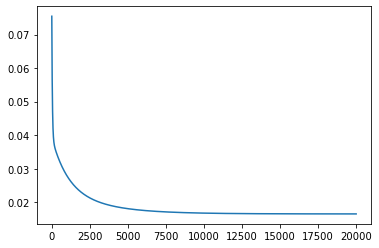

In [96]:
#数据可视化
log = np.array(log)
plt.plot(log[:,0],log[:,1])

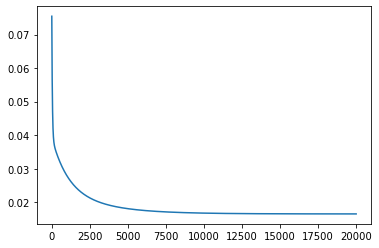

In [97]:
test_log = np.array(test_log)
plt.plot(log[:,0],log[:,1])

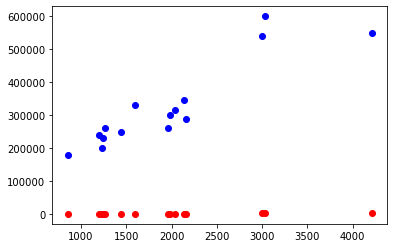

In [98]:
y_pred = np.matmul(X_test, w)
plt.scatter(X_test[:,0],y_pred,c='r')
plt.scatter(X_test[:,0],y_test,c='b')

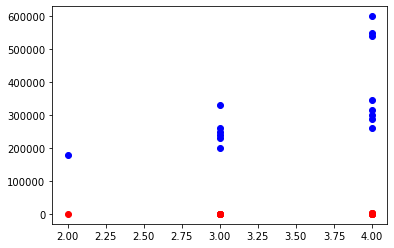

In [99]:
plt.scatter(X_test[:,1],y_pred,c='r')
plt.scatter(X_test[:,1],y_test,c='b')